In [1]:
import numpy as np
import pandas as pd
import os,sys
from pathlib import Path
import matplotlib.pyplot as plt

cwd = os.getcwd() #grabs current working directory

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP' / 'EnergyAnalysis')
inputfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP')
baselinesfolder = str(Path().resolve().parent.parent /'PV_ICE' / 'baselines')
supportMatfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'baselines' / 'SupportingMaterial')
altBaselinesfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'baselines' / 'Energy_CellModuleTechCompare')

if not os.path.exists(testfolder):
    os.makedirs(testfolder)

In [2]:
from platform import python_version 
print(python_version())

3.8.8


In [3]:
import PV_ICE
PV_ICE.__version__


'v0.2.0+430.g7d6b7ec.dirty'

In [4]:
MATERIALS = ['glass', 'aluminium_frames']
moduleFile_m = os.path.join(baselinesfolder, 'baseline_modules_mass_US.csv')
moduleFile_e = os.path.join(baselinesfolder, 'baseline_modules_energy.csv')

In [ ]:
test2 = True # IRENA with weibull params, PV _ICE with t50 t90
test3 = True

# 1. Run PV ICE and IRENA files with standard baselines

In [ ]:
sim1 = PV_ICE.Simulation(name='sim1', path=testfolder)

In [ ]:
sim1.createScenario(name='PV_ICE', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim1.scenario['PV_ICE'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

In [ ]:
moduleinput_m_r_IRENA = os.path.join(altBaselinesfolder, 'mod_r_IRENAregloss_t2.csv')
sim1.createScenario(name='IRENA', massmodulefile=moduleinput_m_r_IRENA, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim1.scenario['IRENA'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

#modified module
moduleinput_m_r_IRENA = os.path.join(altBaselinesfolder, 'mod_r_IRENAregloss.csv')
sim1.createScenario(name='r_IRENA', massmodulefile=moduleinput_m_r_IRENA, energymodulefile=moduleFile_e) 

#modified materials
#glass
matinput_glass_m_improvedRecycle = os.path.join(altBaselinesfolder,'material_mass_glass_improvedRecycle.csv')
matbaseline_e_glass = os.path.join(baselinesfolder,'baseline_material_energy_glass.csv')
sim1.scenario['r_IRENA'].addMaterial('glass', massmatfile=matinput_glass_m_improvedRecycle, energymatfile=matbaseline_e_glass)
#silicon
matinput_silicon_m_improvedRecycle = os.path.join(altBaselinesfolder,'material_mass_silicon_improvedRecycle.csv')
matbaseline_e_si = os.path.join(baselinesfolder,'baseline_material_energy_silicon.csv')
sim1.scenario['r_IRENA'].addMaterial('silicon', massmatfile=matinput_silicon_m_improvedRecycle, energymatfile=matbaseline_e_si)
#silver
matinput_silver_m_improvedRecycle = os.path.join(altBaselinesfolder,'material_mass_silver_improvedRecycle.csv')
matbaseline_e_ag = os.path.join(baselinesfolder,'baseline_material_energy_silver.csv')
sim1.scenario['r_IRENA'].addMaterial('silver', massmatfile=matinput_silver_m_improvedRecycle, energymatfile=matbaseline_e_ag)
#aluminium frames
matinput_Al_m_improvedRecycle = os.path.join(altBaselinesfolder,'material_mass_aluminium_frames_improvedRecycle.csv')
matbaseline_e_al = os.path.join(baselinesfolder,'baseline_material_energy_aluminium_frames.csv')
sim1.scenario['r_IRENA'].addMaterial('aluminium_frames', massmatfile=matinput_Al_m_improvedRecycle, energymatfile=matbaseline_e_al)

#standard materials
baselineMats=['copper', 'encapsulant', 'backsheet']
for mats in range (0, len(baselineMats)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+baselineMats[mats]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+baselineMats[mats]+'.csv')
    sim1.scenario['r_IRENA'].addMaterial(baselineMats[mats], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

In [ ]:
#trim to start in 2000, this trims module and materials
#had to specify and end year, cannot use to extend
sim1.trim_Years(startYear=2000, endYear=2100)

In [ ]:
global_projection = pd.read_csv(os.path.join(supportMatfolder,'output-globalInstallsProjection.csv'), index_col=0)
fig, ax1 = plt.subplots()

ax1.stackplot(global_projection.index, global_projection['World_cum']/1e6, color='#F7A11A')
ax1.set_ylabel('Cumulative Solar Capacity [TW]', color='#F7A11A')
ax1.set_ylim(0,90)
ax1.set_xlim(2000,2100)
ax2 = ax1.twinx()
ax2.plot(global_projection['World_annual_[MWdc]']/1e6)
ax2.set_ylabel('Annual Installations [TW]')
ax2.set_ylim(0,5)
plt.show()

In [ ]:
#Loaded new installed capacity, will be modified in next cell...
plt.plot(sim1.scenario['PV_ICE'].dataIn_m['new_Installed_Capacity_[MW]'], label='PV_ICE')
plt.plot(sim1.scenario['IRENA'].dataIn_m['new_Installed_Capacity_[MW]'], label='Irena')
plt.title("Loaded 'new_Installed_Capacity_[MW]'")
plt.legend()

In [ ]:
#deployment projection for all scenarios
sim1.modifyScenario(scenarios=None,stage='new_Installed_Capacity_[MW]', 
                    value= global_projection['World_annual_[MWdc]'], start_year=2000)

In [ ]:
# RE-plot after modifying scenarios
plt.plot(sim1.scenario['PV_ICE'].dataIn_m['new_Installed_Capacity_[MW]'], label='PV_ICE')
plt.plot(sim1.scenario['IRENA'].dataIn_m['new_Installed_Capacity_[MW]'], label='Irena')
plt.title("Modified 'new_Installed_Capacity_[MW]' with World annual values")
plt.legend()

In [ ]:
IRENAregloss = {'alpha':5.692,
                   'beta':29.697}

In [ ]:
if test3: 
    nameplatedeglimit = 0.3
else:
    nameplatedeglimit = None

if test2:
    sim1.calculateMassFlow(scenarios='PV_ICE', nameplatedeglimit=nameplatedeglimit)
    print("\n\nRunning T50 for PV_ICE and weibull Params for Irena\n")
    sim1.calculateMassFlow(scenarios='IRENA', weibullInputParams=IRENAregloss, nameplatedeglimit=nameplatedeglimit )
else:
    sim1.calculateMassFlow(nameplatedeglimit=nameplatedeglimit) #weibullInputParams=IRENAregloss

In [ ]:
if test3 and test2:
    customname='_debugIrena_test2_test3'
elif test2:
    customname='_debugirena_Test2'
else:
    customname='_debugirena'

sim1.saveSimulation(customname=customname)

In [ ]:
ii_yearly, ii_cumu = sim1.aggregateResults() #have to do this to get auto plots

In [ ]:
effective_capacity = ii_yearly.filter(like='ActiveCapacity')
plt.plot(ii_cumu['newInstalledCapacity_sim1_PV_ICE_[MW]']/1e6, label='Capacity Target', color='black', ls='--')
plt.plot(effective_capacity/1e6, label=sim1.scenario.keys())
plt.legend()
plt.ylabel('Effective Capacity [TW]')
plt.title('Effective Capacity: No Replacements')
plt.ylim(0,)

In [ ]:
ii_yearly.filter(like='Decommisioned')

In [ ]:
# MW. #Sil are this already cumulative? I think this was one of the bugs Garvin found we haven't fixed?
plt.plot(ii_yearly.filter(like='Decommisioned'))
plt.legend(sim1.scenario.keys())

In [ ]:
#plt.plot(ii_yearly['WasteAll_Module_sim1_r_IRENA_[Tonnes]'], label='r_waste')
#plt.plot(ii_yearly['VirginStock_Module_sim1_r_IRENA_[Tonnes]'], label='r_virgin')

plt.plot(ii_yearly['VirginStock_Module_sim1_PV_ICE_[Tonnes]'], label='PVICE_virgin')
plt.plot(ii_yearly['WasteAll_Module_sim1_PV_ICE_[Tonnes]'], label='PVICE_waste')

plt.plot(ii_yearly['VirginStock_Module_sim1_IRENA_[Tonnes]'], label='IRENA virgin')
plt.plot(ii_yearly['WasteAll_Module_sim1_IRENA_[Tonnes]'], label='IRENA waste')

plt.legend()

In [ ]:
# WHere does aggregateREsults "'WasteAll_Module_sim1_IRENA_[Tonnes]" comes from?
# --> Grabs each materials df matdataOut_m column 'mat_Total_Landfilled'; then aggregates into module

In [ ]:
plt.plot(ii_yearly['WasteAll_glass_sim1_IRENA_[Tonnes]'], label='glass waste')
plt.plot(ii_yearly['WasteAll_aluminium_frames_sim1_IRENA_[Tonnes]'], label='AL Frames waste')
plt.plot(ii_yearly['WasteAll_Module_sim1_IRENA_[Tonnes]'], label='Module waste')
plt.legend()
# Math looks correctly (still cumulative but correct)

In [ ]:
plt.plot(sim1.scenario['PV_ICE'].material['glass'].matdataOut_m['mat_Total_Landfilled'], label='PV ICE glass')
plt.plot(sim1.scenario['IRENA'].material['glass'].matdataOut_m['mat_Total_Landfilled'], label='IRENA glass')
plt.legend()
plt.ylabel('GRAMS')

In [ ]:
# mat_Total_Landfilled

In [ ]:
plt.plot(ii_yearly['VirginStock_Module_sim1_PV_ICE_[Tonnes]'], label='PVICE_virgin')
plt.plot(ii_yearly['VirginStock_Module_sim1_IRENA_[Tonnes]'], label='IRENA_virgin')
plt.plot(ii_yearly['WasteAll_Module_sim1_PV_ICE_[Tonnes]'], label='PVICE_waste')
#plt.plot(ii_yearly['WasteAll_Module_sim1_IRENA_[Tonnes]'], label='IRENA_waste')

plt.ylim(0,)
plt.legend()

In [ ]:
plt.plot(sim1.scenario['PV_ICE'].dataOut_m['Yearly_Sum_Area_disposedby_ProjectLifetime'], label='pvice_life')
plt.plot(sim1.scenario['PV_ICE'].dataOut_m['Yearly_Sum_Area_disposedby_Failure'], label='pvice_fail')

plt.plot(sim1.scenario['IRENA'].dataOut_m['Yearly_Sum_Area_disposedby_ProjectLifetime'], label='irena_life')
plt.plot(sim1.scenario['IRENA'].dataOut_m['Yearly_Sum_Area_disposedby_Failure'], label='irena_fail')

#plt.plot(sim1.scenario['r_IRENA'].dataOut_m['Yearly_Sum_Area_disposedby_Failure'], label='r_irena_fail')
#plt.plot(sim1.scenario['r_IRENA'].dataOut_m['Yearly_Sum_Area_disposedby_ProjectLifetime'], label='r_irena_life')

plt.legend()
plt.ylim(0,)

In [ ]:
L0 = sim1.scenario['PV_ICE'].dataOut_m['EOL_Landfill0']
EOLpaths = sim1.scenario['PV_ICE'].dataOut_m['EOL_PATHS']
PG = sim1.scenario['PV_ICE'].dataOut_m['EOL_PG']
PB = sim1.scenario['PV_ICE'].dataOut_m['EOL_BadStatus']
PVICE_EOLpaths = pd.concat([EOLpaths,PG,PB,L0], axis=1)

L0 = sim1.scenario['IRENA'].dataOut_m['EOL_Landfill0']
EOLpaths = sim1.scenario['IRENA'].dataOut_m['EOL_PATHS']
PG = sim1.scenario['IRENA'].dataOut_m['EOL_PG']
PB = sim1.scenario['IRENA'].dataOut_m['EOL_BadStatus']
IRENA_EOLpaths = pd.concat([EOLpaths,PG,PB,L0], axis=1)

plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.plot(IRENA_EOLpaths, label=IRENA_EOLpaths.columns)
plt.legend()
#plt.ylim([0, 2.5e11])
plt.ylim([0, 2.0e10])
plt.title('IRENA')

plt.subplot(1, 3, 2)
plt.plot(PVICE_EOLpaths, label=PVICE_EOLpaths.columns)
plt.ylim([0, 2.0e10])
plt.legend()
plt.title('PVICE')


In [ ]:
PVICE_EOLpaths_norm = PVICE_EOLpaths.divide(PVICE_EOLpaths.sum(axis=1), axis=0)
IRENA_EOLpaths_norm = IRENA_EOLpaths.divide(IRENA_EOLpaths.sum(axis=1), axis=0)



In [ ]:
plt.figure(figsize=(15,5))


plt.subplot(1, 3, 2)
plt.plot(PVICE_EOLpaths_norm, label=PVICE_EOLpaths.columns)
plt.legend()
plt.title('PVICE')

plt.subplot(1, 3, 1)
plt.plot(IRENA_EOLpaths_norm, label=IRENA_EOLpaths.columns)
plt.legend()
plt.title('IRENA')



# 2. Remove Trim Years

In [ ]:
sim2 = PV_ICE.Simulation(name='sim2', path=testfolder)

In [ ]:
sim2.createScenario(name='PV_ICE', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim2.scenario['PV_ICE'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

In [ ]:
moduleinput_m_r_IRENA = os.path.join(altBaselinesfolder, 'mod_r_IRENAregloss_t2.csv')
sim2.createScenario(name='IRENA', massmodulefile=moduleinput_m_r_IRENA, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim2.scenario['IRENA'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

#modified module
moduleinput_m_r_IRENA = os.path.join(altBaselinesfolder, 'mod_r_IRENAregloss.csv')
sim1.createScenario(name='r_IRENA', massmodulefile=moduleinput_m_r_IRENA, energymodulefile=moduleFile_e) 

#modified materials
#glass
matinput_glass_m_improvedRecycle = os.path.join(altBaselinesfolder,'material_mass_glass_improvedRecycle.csv')
matbaseline_e_glass = os.path.join(baselinesfolder,'baseline_material_energy_glass.csv')
sim1.scenario['r_IRENA'].addMaterial('glass', massmatfile=matinput_glass_m_improvedRecycle, energymatfile=matbaseline_e_glass)
#silicon
matinput_silicon_m_improvedRecycle = os.path.join(altBaselinesfolder,'material_mass_silicon_improvedRecycle.csv')
matbaseline_e_si = os.path.join(baselinesfolder,'baseline_material_energy_silicon.csv')
sim1.scenario['r_IRENA'].addMaterial('silicon', massmatfile=matinput_silicon_m_improvedRecycle, energymatfile=matbaseline_e_si)
#silver
matinput_silver_m_improvedRecycle = os.path.join(altBaselinesfolder,'material_mass_silver_improvedRecycle.csv')
matbaseline_e_ag = os.path.join(baselinesfolder,'baseline_material_energy_silver.csv')
sim1.scenario['r_IRENA'].addMaterial('silver', massmatfile=matinput_silver_m_improvedRecycle, energymatfile=matbaseline_e_ag)
#aluminium frames
matinput_Al_m_improvedRecycle = os.path.join(altBaselinesfolder,'material_mass_aluminium_frames_improvedRecycle.csv')
matbaseline_e_al = os.path.join(baselinesfolder,'baseline_material_energy_aluminium_frames.csv')
sim1.scenario['r_IRENA'].addMaterial('aluminium_frames', massmatfile=matinput_Al_m_improvedRecycle, energymatfile=matbaseline_e_al)

#standard materials
baselineMats=['copper', 'encapsulant', 'backsheet']
for mats in range (0, len(baselineMats)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+baselineMats[mats]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+baselineMats[mats]+'.csv')
    sim1.scenario['r_IRENA'].addMaterial(baselineMats[mats], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

#trim to start in 2000, this trims module and materials
#had to specify and end year, cannot use to extend
sim2.trim_Years(startYear=2000, endYear=2100)

In [ ]:
global_projection = pd.read_csv(os.path.join(supportMatfolder,'output-globalInstallsProjection.csv'), index_col=0)
fig, ax1 = plt.subplots()

ax1.stackplot(global_projection.index, global_projection['World_cum']/1e6, color='#F7A11A')
ax1.set_ylabel('Cumulative Solar Capacity [TW]', color='#F7A11A')
ax1.set_ylim(0,90)
ax1.set_xlim(2000,2100)
ax2 = ax1.twinx()
ax2.plot(global_projection['World_annual_[MWdc]']/1e6)
ax2.set_ylabel('Annual Installations [TW]')
ax2.set_ylim(0,5)
plt.show()

In [ ]:
#deployment projection for all scenarios
sim2.modifyScenario(scenarios=None,stage='new_Installed_Capacity_[MW]', 
                    value= global_projection.loc[:2050,'World_annual_[MWdc]'], start_year=2000)

In [ ]:
IRENAregloss = {'alpha':5.692,
                   'beta':29.697}

In [ ]:
sim2.calculateMassFlow() #weibullInputParams=IRENAregloss

In [ ]:
sim2.saveSimulation(customname='_debugirena2a')

In [ ]:
ii_yearly2, ii_cumu2 = sim2.aggregateResults() #have to do this to get auto plots

In [ ]:
effective_capacity = ii_yearly2.filter(like='ActiveCapacity')
plt.plot(ii_cumu2['newInstalledCapacity_sim2_PV_ICE_[MW]']/1e6, label='Capacity Target', color='black', ls='--')
plt.plot(effective_capacity/1e6, label=sim2.scenario.keys())
plt.legend()
plt.ylabel('Effective Capacity [TW]')
plt.title('Effective Capacity: No Replacements')
plt.ylim(0,)

In [ ]:
plt.plot(ii_yearly2.filter(like='Decommisioned'))
plt.legend(sim2.scenario.keys())

In [ ]:
plt.plot(ii_yearly2['WasteAll_Module_sim2_IRENA_[Tonnes]'], label='IRENA_waste')
plt.plot(ii_yearly2['VirginStock_Module_sim2_IRENA_[Tonnes]'], label='IRENA_virgin')

#plt.plot(ii_yearly2['WasteAll_Module_sim2_r_IRENA_[Tonnes]'], label='r_waste')
#plt.plot(ii_yearly2['VirginStock_Module_sim2_r_IRENA_[Tonnes]'], label='r_virgin')

plt.plot(ii_yearly2['WasteAll_Module_sim2_PV_ICE_[Tonnes]'], label='PVICE_waste')
plt.plot(ii_yearly2['VirginStock_Module_sim2_PV_ICE_[Tonnes]'], label='PVICE_virgin')

plt.legend()

In [ ]:
plt.plot(ii_yearly2['VirginStock_Module_sim2_IRENA_[Tonnes]'], label='IRENA_virgin')
plt.plot(ii_yearly2['WasteAll_Module_sim2_PV_ICE_[Tonnes]'], label='PVICE_waste')
plt.plot(ii_yearly2['VirginStock_Module_sim2_PV_ICE_[Tonnes]'], label='PVICE_virgin')
plt.ylim(0,)
plt.legend()

In [ ]:
plt.plot(sim2.scenario['IRENA'].dataOut_m['Yearly_Sum_Area_disposedby_Failure'], label='irena_fail')
plt.plot(sim2.scenario['IRENA'].dataOut_m['Yearly_Sum_Area_disposedby_ProjectLifetime'], label='irena_life')

#plt.plot(sim2.scenario['r_IRENA'].dataOut_m['Yearly_Sum_Area_disposedby_Failure'], label='r_irena_fail')
#plt.plot(sim2.scenario['r_IRENA'].dataOut_m['Yearly_Sum_Area_disposedby_ProjectLifetime'], label='r_irena_life')

plt.plot(sim2.scenario['PV_ICE'].dataOut_m['Yearly_Sum_Area_disposedby_Failure'], label='pvice_fail')
plt.plot(sim2.scenario['PV_ICE'].dataOut_m['Yearly_Sum_Area_disposedby_ProjectLifetime'], label='pvice_life')
plt.legend()
plt.ylim(0,)

# 3. Check Non IRENA files

In [104]:
sim3 = PV_ICE.Simulation(name='sim3', path=testfolder)

path = C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\TEMP\EnergyAnalysis


In [105]:
sim3.createScenario(name='PV_ICE', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim3.scenario['PV_ICE'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

In [106]:
moduleinput_m_r_PERC = os.path.join(altBaselinesfolder, 'mod_r_PERC.csv')
sim3.createScenario(name='r_PERC', massmodulefile=moduleinput_m_r_PERC, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim3.scenario['r_PERC'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

sim3.modifyScenario('r_PERC', 'mod_lifetime', 30.0, start_year=2022) #changing module 

In [107]:
#trim to start in 2000, this trims module and materials
#had to specify and end year, cannot use to extend
sim3.trim_Years(startYear=2000, endYear=2100)

Trimming and extending  PV_ICE
PV_ICE glass : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE aluminium_frames : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE aluminium_frames : Data trimmed for Mass, years now encompass  2000  to  2100
Trimming and extending  r_PERC
r_PERC glass : Data trimmed for Energy, years now encompass  2000  to  2100
r_PERC aluminium_frames : Data trimmed for Energy, years now encompass  2000  to  2100
r_PERC aluminium_frames : Data trimmed for Mass, years now encompass  2000  to  2100


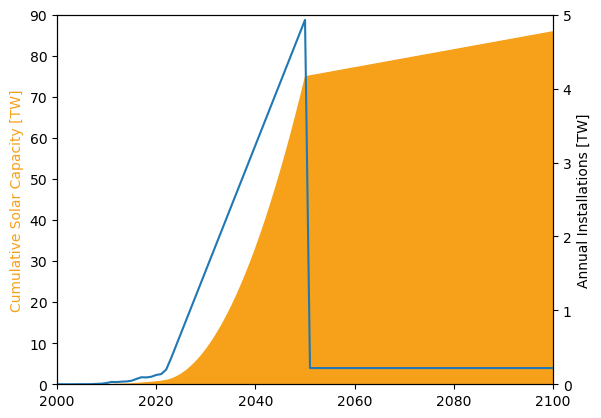

In [108]:
global_projection = pd.read_csv(os.path.join(supportMatfolder,'output-globalInstallsProjection.csv'), index_col=0)
fig, ax1 = plt.subplots()

ax1.stackplot(global_projection.index, global_projection['World_cum']/1e6, color='#F7A11A')
ax1.set_ylabel('Cumulative Solar Capacity [TW]', color='#F7A11A')
ax1.set_ylim(0,90)
ax1.set_xlim(2000,2100)
ax2 = ax1.twinx()
ax2.plot(global_projection['World_annual_[MWdc]']/1e6)
ax2.set_ylabel('Annual Installations [TW]')
ax2.set_ylim(0,5)
plt.show()

In [109]:
#deployment projection for all scenarios
sim3.modifyScenario(scenarios=None,stage='new_Installed_Capacity_[MW]', 
                    value= global_projection['World_annual_[MWdc]'], start_year=2000)

In [110]:
IRENAregloss = {'alpha':5.692,
                   'beta':29.697}

In [111]:
sim3.calculateMassFlow() #weibullInputParams=IRENAregloss

>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
Working on Scenario:  r_PERC
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  r_PERC  =  61549967.7230085  tonnes.


In [112]:
sim3.saveSimulation(customname='_debugirena3')

:) Saved Input and Output Dataframes


In [113]:
ii_yearly3, ii_cumu3 = sim3.aggregateResults() #have to do this to get auto plots

(0.0, 90.26425956655)

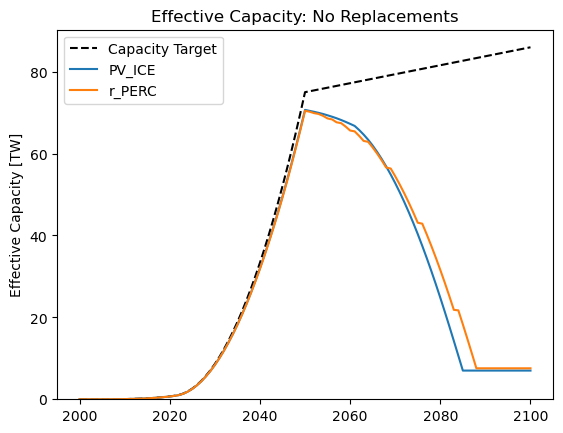

In [114]:
effective_capacity = ii_yearly3.filter(like='ActiveCapacity')
plt.plot(ii_cumu3['newInstalledCapacity_sim3_PV_ICE_[MW]']/1e6, label='Capacity Target', color='black', ls='--')
plt.plot(effective_capacity/1e6, label=sim3.scenario.keys())
plt.legend()
plt.ylabel('Effective Capacity [TW]')
plt.title('Effective Capacity: No Replacements')
plt.ylim(0,)

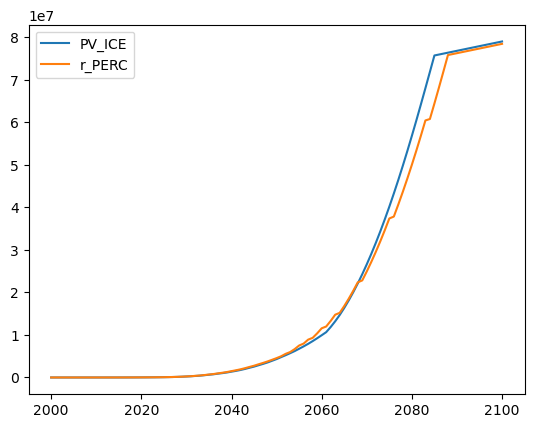

In [115]:
plt.plot(ii_yearly3.filter(like='Decommisioned'))
plt.legend(sim3.scenario.keys())

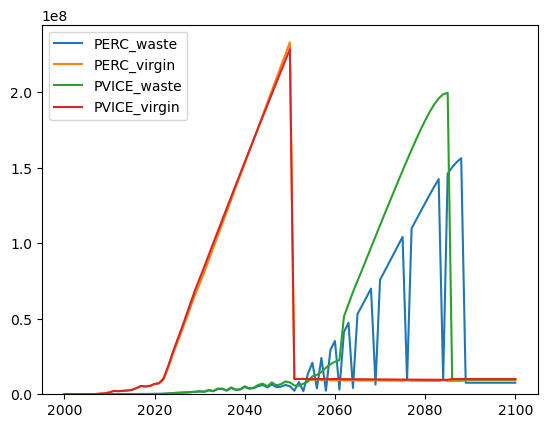

In [116]:


plt.plot(ii_yearly3['WasteAll_Module_sim3_r_PERC_[Tonnes]'], label='PERC_waste')
plt.plot(ii_yearly3['VirginStock_Module_sim3_r_PERC_[Tonnes]'], label='PERC_virgin')

plt.plot(ii_yearly3['WasteAll_Module_sim3_PV_ICE_[Tonnes]'], label='PVICE_waste')
plt.plot(ii_yearly3['VirginStock_Module_sim3_PV_ICE_[Tonnes]'], label='PVICE_virgin')
plt.ylim(0,)
plt.legend()

(0.0, 19016449790.418247)

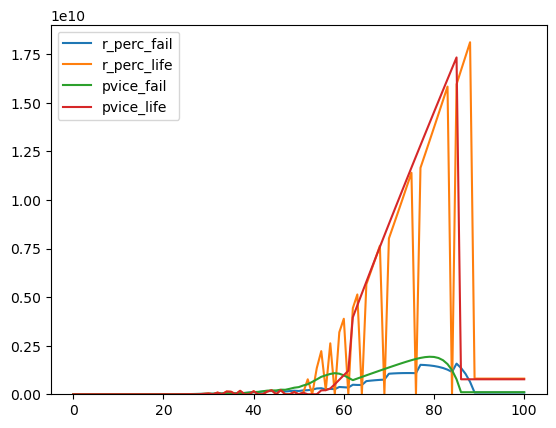

In [117]:


plt.plot(sim3.scenario['r_PERC'].dataOut_m['Yearly_Sum_Area_disposedby_Failure'], label='r_perc_fail')
plt.plot(sim3.scenario['r_PERC'].dataOut_m['Yearly_Sum_Area_disposedby_ProjectLifetime'], label='r_perc_life')

plt.plot(sim3.scenario['PV_ICE'].dataOut_m['Yearly_Sum_Area_disposedby_Failure'], label='pvice_fail')
plt.plot(sim3.scenario['PV_ICE'].dataOut_m['Yearly_Sum_Area_disposedby_ProjectLifetime'], label='pvice_life')
plt.legend()
plt.ylim(0,)

Text(0.5, 1.0, 'Area_for_EOL_pathsG')

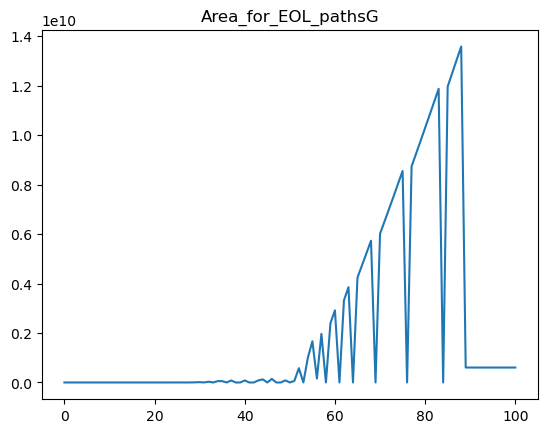

In [131]:
plt.plot(sim3.scenario['r_PERC'].dataOut_m['Area_for_EOL_pathsG'])
plt.title('Area_for_EOL_pathsG')

Text(0.5, 1.0, 'Status_BAD_Area')

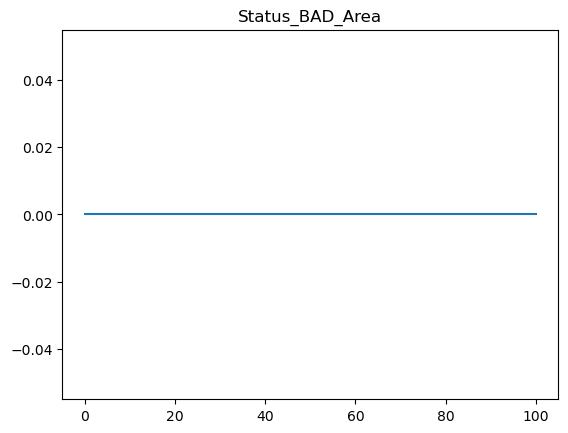

In [132]:
plt.plot(sim3.scenario['r_PERC'].dataOut_m['Status_BAD_Area'])
plt.title('Status_BAD_Area')

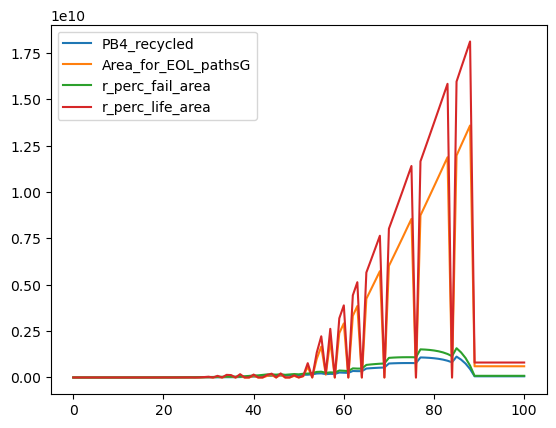

In [138]:
plt.plot(sim3.scenario['r_PERC'].dataOut_m['PB4_recycled'], label = 'PB4_recycled')
plt.plot(sim3.scenario['r_PERC'].dataOut_m['Area_for_EOL_pathsG'], label='Area_for_EOL_pathsG')

plt.plot(sim3.scenario['r_PERC'].dataOut_m['Yearly_Sum_Area_disposedby_Failure'], label='r_perc_fail_area')
plt.plot(sim3.scenario['r_PERC'].dataOut_m['Yearly_Sum_Area_disposedby_ProjectLifetime'], label='r_perc_life_area')

plt.legend()

In [120]:
kills = pd.concat([sim3.scenario['r_PERC'].dataOut_m['Yearly_Sum_Area_disposedby_Failure'],
           sim3.scenario['r_PERC'].dataOut_m['Yearly_Sum_Area_disposedby_ProjectLifetime']], axis=1)

In [122]:
kills.loc[40:60]

,Yearly_Sum_Area_disposedby_Failure,Yearly_Sum_Area_disposedby_ProjectLifetime
40,1.072923e+08,1.573474e+08
41,1.135395e+08,0.000000e+00
42,1.387332e+08,0.000000e+00
43,1.651167e+08,1.399602e+08
44,1.654225e+08,2.057867e+08
45,1.515479e+08,0.000000e+00
46,1.729924e+08,2.190883e+08
47,1.436591e+08,0.000000e+00
48,1.636717e+08,0.000000e+00
49,1.839967e+08,1.173221e+08
